In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt

In [ ]:
torch.set_printoptions(precision=20)

In [ ]:
def return_max_min(C):
   egvs = np.linalg.eigvalsh(C)
   return min(egvs) , max(egvs)


In [ ]:
def plot3Dcountour(function,xmin,xmax,ymin,ymax):
    xmesh, ymesh = np.mgrid[xmin:xmax:50j,ymin:ymax:50j]
    fmesh=np.zeros((50,50))
    for i in range(50):
        for j in range(50):
            fmesh[i][j]=function(torch.tensor(np.array([xmesh[i][j],ymesh[i][j]])).reshape(-1,1)).detach().numpy()
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    ax.plot_surface(xmesh, ymesh, fmesh)


In [ ]:
N=50
random_seed=np.random.randint(200)
Q=make_spd_matrix(N,random_state=random_seed)
Q=(Q+Q.T)
b=torch.tensor(np.random.rand(N),dtype = torch.float64).reshape(-1,1)
Q=torch.tensor(Q)

def QuadraticFunction(x):
  return (1/2*(x.T@Q)@x - b.T@x)[0][0]

In [ ]:
def BOHACHEVSKY_F1(x):
  return x[0]*x[0]+2*x[1]*x[1]-0.3*torch.cos(3*3.1415927410125732*x[0])-0.4*torch.cos(4*3.1415927410125732*x[1])+0.7

In [ ]:
def SPHERE(x):
  return torch.square(torch.norm(x))

In [ ]:
def BOOTH_FUNCTION(x):
  return (x[0]+2*x[1]-7)**2+(2*x[0]+x[1]-5)**2

In [ ]:
def ROSENBROCK_FUNCTION(x):
  return (10*(x[1]-x[0]**2))**2 + (1-x[0])**2

In [ ]:
def GRAMACY_LEE_FUNCTION(x):
  return ((x-1)**4)+(torch.sin(10*3.141*x))/(2*x)

In [ ]:
def RASTRIGIN_FUNCTION(x):
  f=0
  d=2
  for i in range(d):
    f+=(x[i]*x[i]-10*torch.cos(2*3.141*x[i]))
  return 10*d+ f

In [ ]:
def POWELL_FUNCTION(x):
  return (10**4*x[0]*x[1]-1)**2+ (torch.exp(-x[0])+torch.exp(-x[1])-1.0001)**2

In [ ]:
def BROWN_BADLY_SCALED(x):
  return (x[0]-10**6)**2+(x[1]-2*(10**6))**2

In [ ]:
def FREUD_ROTH_FUNCTION(x):
  return (-13+x[0]+((5-x[1])*x[1]-2)*x[1])**2 + (-29+x[0]+((x[1]+1)*x[1]-14)*x[1])**2

In [ ]:
def SUMSQUARE(x):
  d=x.shape[0]
  f=0
  for i in range(d):
    f+=(i+1)*(x[i][0]**2)
  return f

In [ ]:
def wave_function(x):
    return (torch.abs(x)-5)*torch.cos(2*3.14*x)

In [ ]:
#wave-function
X = torch.tensor(np.random.uniform(-5,5, 10000).reshape(-1,1))
Y = wave_function(X)

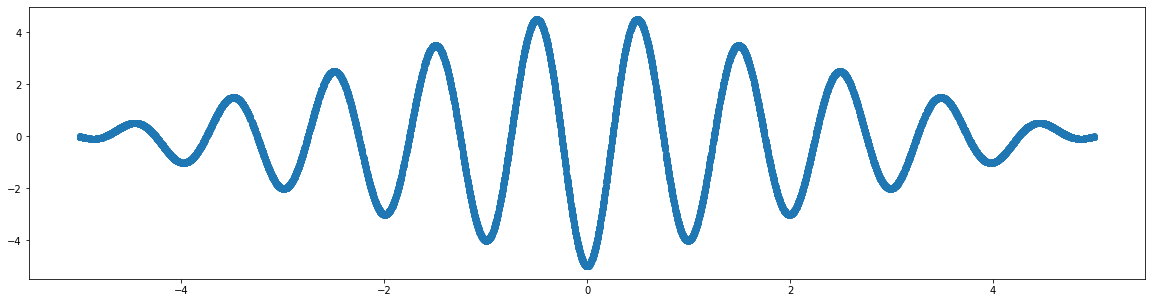

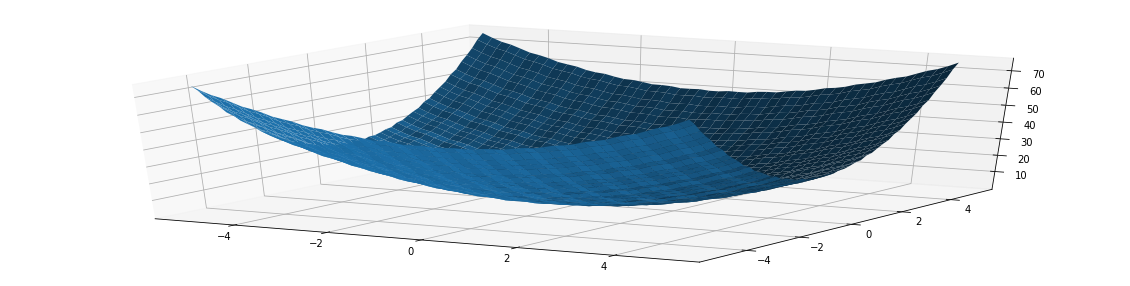

In [ ]:
plot3Dcountour(BOHACHEVSKY_F1,-5,5,-5,5)

In [ ]:
def L2norm(dk):
  return np.linalg.norm(dk)

def GeneralSteepestDescent(x,function_,epochs=-1,stopping_criteria="relative_value_change",cutoff=1e-10):
  epoch=0
  function_values=[]
  x_values=[]
  x_prev=x
  f_previous_iter=function_(x)
  alpha_start=0.1
  
  while True:
    x.requires_grad_(True)
    fx=function_(x)
    function_values.append(fx.detach().numpy())
    x_values.append(x.detach().numpy())
    fx.backward()
    dk=x.grad

    x_= x-alpha_start*dk
    fx_ = function_(x_)
    alpha=(((dk.T@dk)*(alpha_start)**2)/(2*(fx_- fx + alpha_start*(dk.T@dk)))).detach().numpy()[0][0]
    if np.isnan(alpha):
      break      
    
    x= x-alpha*dk
    f_present_iter= function_(x)

    if stopping_criteria=="direction_magnitude" and L2norm(dk)<cutoff:
      break
    if stopping_criteria =="relative_function_change" and (abs((f_present_iter-f_previous_iter).detach().numpy())/f_previous_iter.detach().numpy())[0][0] < cutoff:
      break
    if stopping_criteria=="relative_value_change" and (L2norm((x-x_prev).detach().numpy()))<cutoff:
      print("very low change so exiting")
      break
    
    alpha_start=alpha
    x=x.detach()
    x_prev=x
    epoch=epoch+1
  return x,epoch,function_values,x_values

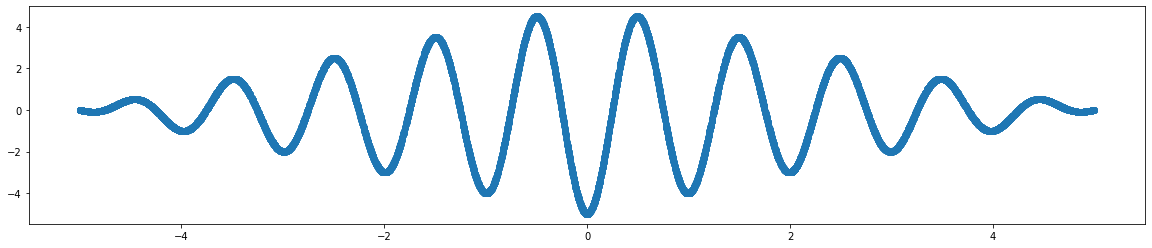

In [ ]:
plt.scatter(X.detach().numpy(),Y.detach().numpy())
plt.rcParams["figure.figsize"] = (20,4)

In [ ]:
x,epoch,function_values,x_values=GeneralSteepestDescent(torch.tensor([-2.3]).reshape(-1,1),wave_function)

very low change so exiting


In [ ]:
x

tensor([[-1.49353611469268798828]], grad_fn=<SubBackward0>)

In [ ]:
def ModifiedSteepestDescent(x,function_,alpha=0.1,stopping_criteria="relative_value_change",cutoff=1e-5,reducing_factor=10):
  epoch=0
  f_previous_iter=function_(x)
  alpha=0.1
  function_values=[]
  x_values=[]

  while True:
    x.requires_grad_(True)
    fx=function_(x)
    x_values.append(x.detach().numpy())
    fx.backward()
    dk=x.grad

    x_= x-alpha*dk
    fx_ = function_(x_)    

    if (fx_ < fx):
      function_values.append(fx_.detach().numpy())
      x_values.append(x_.detach().numpy())
      if stopping_criteria=="relative_value_change" and (L2norm((x_-x).detach().numpy()))<cutoff:
        print("very low value change so exiting")
        break
      x=x_.detach()
      continue
    else:
      alpha=alpha/reducing_factor
      print("changing alpha present alpha is ",alpha)
      if alpha<cutoff:
        break
      continue 

  return x,function_values,x_values 

In [ ]:
x,function_values,x_values=ModifiedSteepestDescent(torch.tensor([3.5]).reshape(-1),wave_function,alpha=0.1)

changing alpha present alpha is  0.01
changing alpha present alpha is  0.001
changing alpha present alpha is  0.0001
changing alpha present alpha is  1e-05
changing alpha present alpha is  1.0000000000000002e-06


In [ ]:
x

tensor([3.97749710083007812500], requires_grad=True)

In [ ]:
x_values

[array([3.5], dtype=float32),
 array([3.5894935], dtype=float32),
 array([3.5894935], dtype=float32),
 array([4.1383543], dtype=float32),
 array([4.1383543], dtype=float32),
 array([4.1383543], dtype=float32),
 array([4.043505], dtype=float32),
 array([4.043505], dtype=float32),
 array([4.018373], dtype=float32),
 array([4.018373], dtype=float32),
 array([4.002109], dtype=float32),
 array([4.002109], dtype=float32),
 array([3.9920774], dtype=float32),
 array([3.9920774], dtype=float32),
 array([3.9860501], dtype=float32),
 array([3.9860501], dtype=float32),
 array([3.9824793], dtype=float32),
 array([3.9824793], dtype=float32),
 array([3.9803798], dtype=float32),
 array([3.9803798], dtype=float32),
 array([3.9791508], dtype=float32),
 array([3.9791508], dtype=float32),
 array([3.978433], dtype=float32),
 array([3.978433], dtype=float32),
 array([3.9780142], dtype=float32),
 array([3.9780142], dtype=float32),
 array([3.9777703], dtype=float32),
 array([3.9777703], dtype=float32),
 array

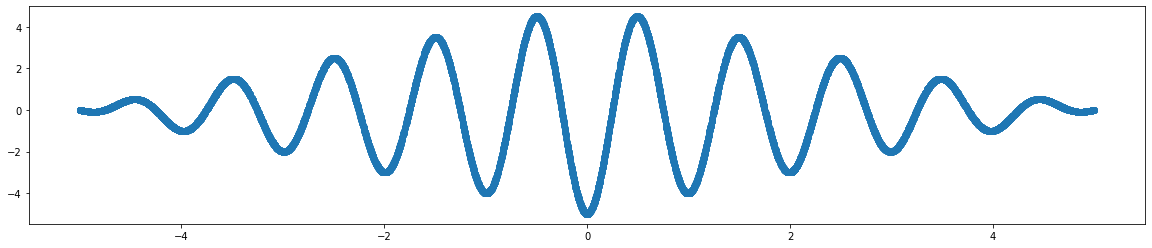

In [ ]:
plt.scatter(X.detach().numpy(),Y.detach().numpy())
plt.rcParams["figure.figsize"] = (20,4)

In [ ]:
class GeneralSD():
  def __init__(self,start_alpha=0.1):
    super(GeneralSD, self).__init__()
    alpha_start=start_alpha
    #self.Optimal_Value=optimum
  
  def L2norm(selSPHEREf,dk):
    return np.linalg.norm(dk)

  def GeneralSteepestDescent(self,x,function_,epochs=-1,stopping_criteria="direction_magnitude",cutoff=1e-5):
    #"direction_magnitude will stop when the magnitude of direction is smaller than cutoff"
    #"closeness to optimal solution will stop when xk is close to optimal value"
    epoch=0
    function_values=[]
    x_values=[]
    x_prev=x
    f_previous_iter=function_(x)
    while True:

      x.requires_grad_(True)
      fx=function_(x)
      function_values.append(fx.detach().numpy())
      x_values.append(x.detach().numpy())
      fx.backward()
      dk=x.grad

      x_= x-alpha_start*dk
      fx_ = function_(x_)
      alpha=(((dk.T@dk)*(alpha_start)**2)/(2*(fx_- fx + alpha_start*(dk.T@dk)))).detach().numpy()[0][0]
      if np.isnan(alpha):
        break      
      
      x=x-alpha*dk
      f_present_iter= function_(x)

      if stopping_criteria=="direction_magnitude" and self.L2norm(dk)<cutoff:
        break
      if stopping_criteria =="relative_function_change" and (abs((f_present_iter-f_previous_iter).detach().numpy())/f_previous_iter.detach().numpy())[0][0] < cutoff:
        break
      if stopping_criteria=="relative_value_change" and (self.L2norm((x-x_prev).detach().numpy())/self.L2norm(x_prev.detach().numpy()))<cutoff:
        break
      
      alpha_start=alpha
      x=x.detach()
      x_prev=x
      epoch=epoch+1
    return x,epoch,function_values,x_values

In [ ]:
#closeness_optimal
#direction_magnitude
#relative_function_change
#relative_value_change
#"direction_magnitude will stop when the magnitude of direction is smaller than cutoff"
#"closeness to optimal solution will stop when xk is close to optimal value"
#"Stops when the relative change of function value is less than cutoff"
#"Stops when the relative change of x value is less than cutoff"

In [ ]:
def generateCDMatrix(n,CD):
  cond_P = CD     # Condition number
  log_cond_P = np.log(cond_P)
  exp_vec = np.arange(-log_cond_P/4., log_cond_P * (n + 1)/(4 * (n - 1)), log_cond_P/(2.*(n-1)))
  s = np.exp(exp_vec)
  S = np.diag(s)
  np.random.seed(42)
  U, _ = np.linalg.qr((np.random.rand(n, n) - 5.) * 200)
  V, _ = np.linalg.qr((np.random.rand(n, n) - 5.) * 200)
  P = U.dot(S).dot(V.T)
  #symmetric matrix
  P = P.dot(P.T)
  return (P+P.T)


In [ ]:
N_iter=1
N=50
CD_NO=[]
epochs_taken=[]
CD=100

for i in range(N_iter):
  random_seed=np.random.randint(200)
  #Q=make_spd_matrix(N,random_state=random_seed)
  #Q=(Q+Q.T)
  try:
    Q=generateCDMatrix(N,CD)
  except:
    CD+=1
    continue  
  b=torch.tensor(np.random.rand(N),dtype = torch.float64).reshape(-1,1)
  Q=torch.tensor(Q)
  gsd=GeneralSD()
  start_value=torch.tensor(np.ones(N), dtype = torch.float64).reshape(-1,1)
  opt,epoch,function_values,x_values=gsd.GeneralSteepestDescent(start_value,QuadraticFunction,stopping_criteria="relative_value_change",cutoff=1e-5)
  lambda_min,lambda_max=return_max_min(Q)
  CD_NO.append(lambda_max/lambda_min)

  epochs_taken.append(epoch)
  print("Process completed for random matrix No ",i)
  CD+=1

Process completed for random matrix No  0


In [ ]:
N_iter=200
N=50
CD_NO=[]
epochs_taken=[]

for i in range(N_iter):
  random_seed=np.random.randint(200)
  Q=make_spd_matrix(N,random_state=random_seed)
  Q=(Q+Q.T)
  b=torch.tensor(np.random.rand(N),dtype = torch.float64).reshape(-1,1)
  Q=torch.tensor(Q)
  gsd=GeneralSD()
  start_value=torch.tensor(np.ones(N), dtype = torch.float64).reshape(-1,1)
  opt,epoch,function_values,x_values=gsd.GeneralSteepestDescent(start_value,QuadraticFunction,stopping_criteria="relative_value_change")
  lambda_min,lambda_max=return_max_min(Q)
  CD_NO.append(lambda_max/lambda_min)

  epochs_taken.append(epoch)
  print("Process completed for random matrix No ",i)

Process completed for random matrix No  0
Process completed for random matrix No  1
Process completed for random matrix No  2


KeyboardInterrupt: ignored

Text(0, 0.5, 'No of Iterations')

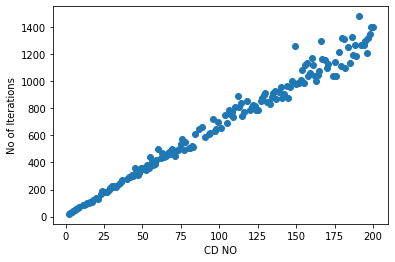

In [ ]:
plt.scatter(CD_NO,epochs_taken)
plt.xlabel("CD NO")
plt.ylabel("No of Iterations")

Text(0.5, 0, 'No of Iterations')

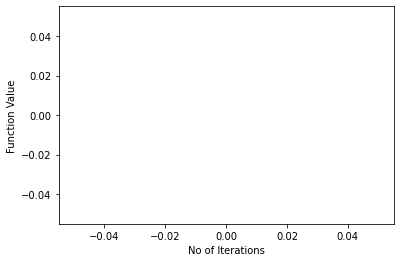

In [ ]:
plt.plot(function_values)
plt.ylabel("Function Value")
plt.xlabel("No of Iterations")

In [ ]:
N=2
gsd=GeneralSD(start_alpha=0.01)
function_=SUMSQUARE
start_value=torch.tensor(np.array([2,11]), dtype = torch.float64).reshape(-1,1)
#start_value=torch.tensor(np.ones(N), dtype = torch.float64).reshape(-1,1)
opt,epoch,function_values,x_values=gsd.GeneralSteepestDescent(start_value,function_,stopping_criteria="relative_value_change",cutoff=1e-10)

In [ ]:
opt=opt.detach().numpy()

In [ ]:
opt

array([[ 1.70307697e-163],
       [-3.09556432e-163]])

In [ ]:
def drawPlots(function,x_values,xmin=-3,xmax=3,ymin=-3,ymax=3):
  xmesh, ymesh = np.mgrid[xmin:xmax:50j,ymin:ymax:50j]
  fmesh=np.zeros((50,50))
  for i in range(50):
    for j in range(50):
      fmesh[i][j]=function(torch.tensor(np.array([xmesh[i][j],ymesh[i][j]])).reshape(-1,1)).detach().numpy()
  fig = plt.figure()
  ax = fig.gca(projection="3d")
  ax.plot_surface(xmesh, ymesh, fmesh)

  print("")
  fig = plt.figure()
  plt.axis("equal")
  plt.contour(xmesh, ymesh, fmesh)

  print("")
  fig = plt.figure()
  plt.axis("equal")
  plt.contour(xmesh, ymesh, fmesh, 50)
  it_array = np.array(x_values).reshape(len(x_values),2)
  plt.plot(it_array.T[0], it_array.T[1], "x-")

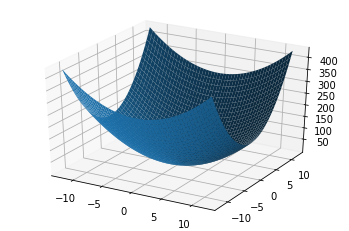

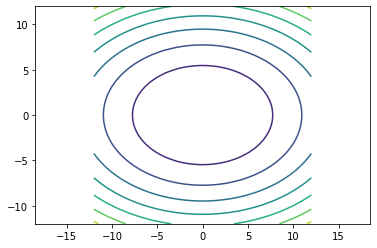

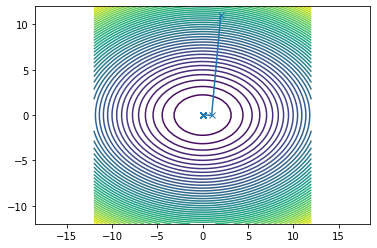

In [ ]:
drawPlots(function_,x_values,xmin=-12,xmax=12,ymin=-12,ymax=12)

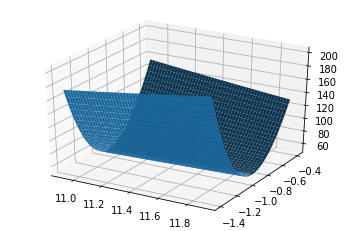

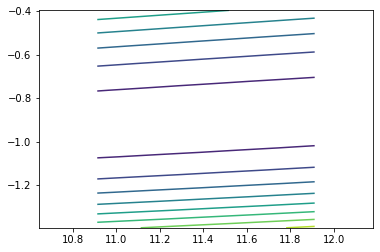

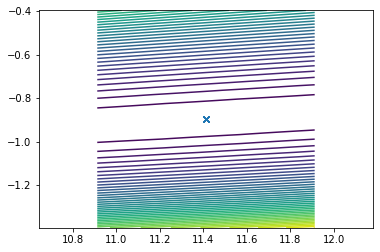

In [ ]:
k=0.5
drawPlots(function_,x_values[-15:], opt[0][0]-k,opt[0][0]+k,opt[1][0]-k, opt[1][0]+k)

In [ ]:
def drawPlots2D(function,x_values,xmin=-1,xmax=1):
  xmesh = np.linspace(xmin,xmax,50)
  fmesh=np.zeros(50)
  for i in range(50):
      fmesh[i]=function(torch.tensor(np.array([xmesh[i]]))).detach().numpy()
  fig = plt.figure()
  plt.plot(xmesh, fmesh)

  print("")
  fig = plt.figure()
  it_array = np.array(x_values)
  plt.plot(xmesh, fmesh)
  plt.plot(it_array.T[0], "x-")

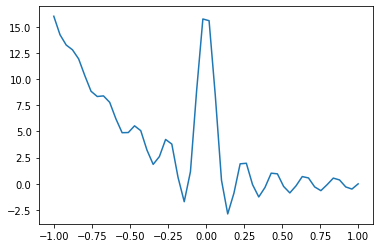

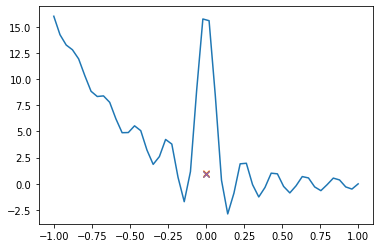

In [ ]:
drawPlots2D(GRAMACY_LEE_FUNCTION,x_values)

In [ ]:
x_values

[array([[1.]]),
 array([[0.93644089]]),
 array([[0.94917861]]),
 array([[0.94911272]])]